In [4]:
from imports import *
from exactDiagMethods import build_exact_diag_hamiltonian, perform_exact_diag
from globalMethods import  build_initial_states, output_results
from vqteMethods import hamiltonian_generation, perform_vqte

# Don't forget to make F_L, F_R lists
# Make everything work with eps list
# Comment and delete old methods
# Make sure all imports are relevant


In [ ]:
def main():
    # Initialize the simulation parameters
    N = 2

    gamma_L= 5
    gamma_R = 10

    eps = 1

    mu_L= 5
    mu_R= 2

    T_L = 1
    T_R= 1

    beta_L=1/T_L
    beta_R=1/T_R
    F_L = 1/(np.exp(beta_L*(eps-mu_L))+1)
    F_R = 1/(np.exp(beta_R*(eps-mu_R))+1)

    J = 0

    eps_list = []

    for i in range(N):
        eps_list.append(1)

  
    time = 10
    dt = 0.01
    nt = int(time/dt)

 

    exact_diag_ham = build_exact_diag_hamiltonian(J, eps_list)

    print("Exact Ham", exact_diag_ham)


    ham_real, ham_imag = hamiltonian_generation(N, eps_list, gamma_L, gamma_R, F_L, F_R,J)


    print("Ham real", ham_real)
    print("Ham imag", ham_imag)



    vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real)


    exact_diag_results = perform_exact_diag(gamma_L, F_L, gamma_R, F_R, dt, nt, exact_diag_init_state,exact_diag_ham, N)
    print(exact_diag_results)
 
    vqte_results = perform_vqte(ham_real, ham_imag, vqte_init_state, dt, nt, ansatz, init_param_values,N)
    
    # # Output results
    output_results(vqte_results, exact_diag_results, time, nt)

Exact Ham [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 2.+0.j]]
Ham real SparsePauliOp(['ZIII', 'IIZI', 'IZII', 'IIIZ', 'XIYI', 'YIXI', 'IYIX', 'IXIY', 'XXII', 'IIXX', 'YYII', 'IIYY'],
              coeffs=[ 0.5       +0.j, -0.5       +0.j,  0.5       +0.j, -0.5       +0.j,
  1.20503448+0.j,  1.20503448+0.j,  1.15529289+0.j,  1.15529289+0.j,
  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j])
Ham imag SparsePauliOp(['XIXI', 'YIYI', 'IIII', 'ZIII', 'IIZI', 'IXIX', 'IYIY', 'IIII', 'IZII', 'IIIZ'],
              coeffs=[-1.25      +0.j,  1.25      +0.j,  2.5       +0.j,  1.20503448+0.j,
  1.20503448+0.j, -2.5       +0.j,  2.5       +0.j,  5.        +0.j,
  1.15529289+0.j,  1.15529289+0.j])
Exact diag initial: -1.2246467991473522e-16
Exact diag initial: -1.2246467991473522e-16
[[np.float64(-1.2246467991473522e-16), np.float64(0.3863923181193124), np.float64(0.6207511057361128), np.float64(0.76289689579

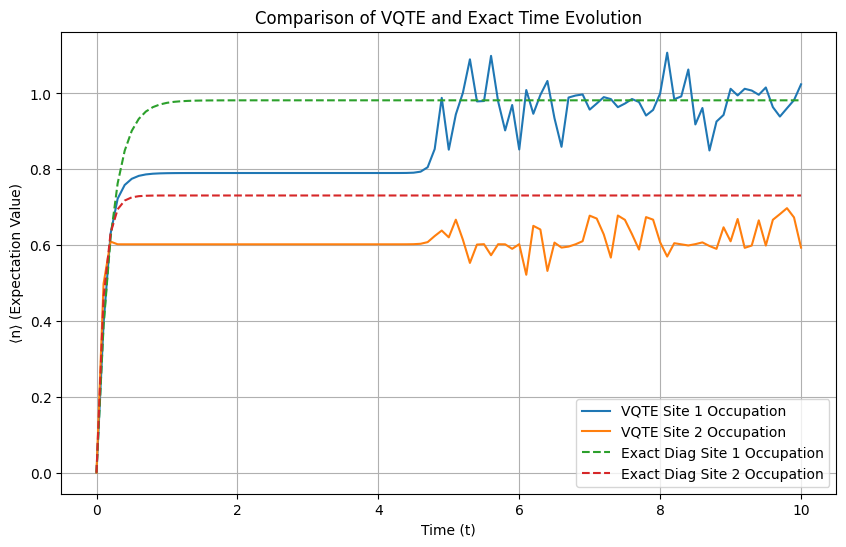

In [6]:
main()